# workshop-1:Sturdy-Octo-Disco-Adding-Sunglasses-for-a-Cool-New-Look #
# Developed By:R.Mounish Vamsi Kumar #
# Register No: 212224240096 #

In [1]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Face')

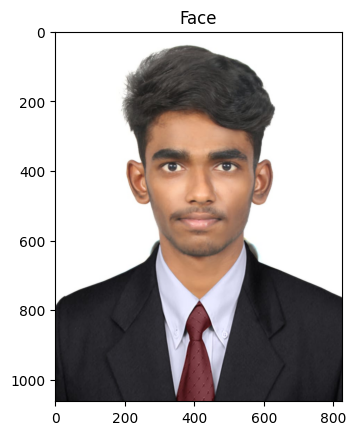

In [2]:

faceImage = cv2.imread('pic.jpeg')
plt.imshow(faceImage[:,:,::-1]);plt.title("Face")


In [3]:
faceImage.shape


(1062, 826, 3)

Text(0.5, 1.0, 'glassPNG')

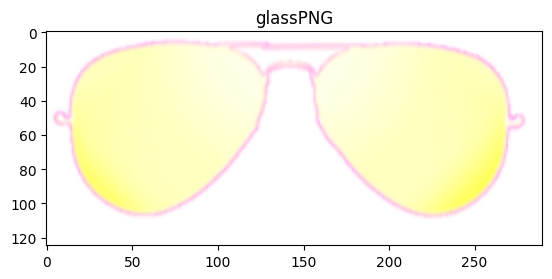

In [4]:
# Load the Sunglass image with Alpha channel
# (http://pluspng.com/sunglass-png-1104.html)
glassPNG = cv2.imread('sunglasses.png',-1)
plt.imshow(glassPNG[:,:,::-1]);plt.title("glassPNG")


In [5]:

# Resize the image to fit over the eye region
glassPNG = cv2.resize(glassPNG,(190,50))
print("image Dimension ={}".format(glassPNG.shape))

image Dimension =(50, 190, 4)


In [6]:

# Separate the Color and alpha channels
glassBGR = glassPNG[:,:,0:3]
glassMask1 = glassPNG[:,:,3]


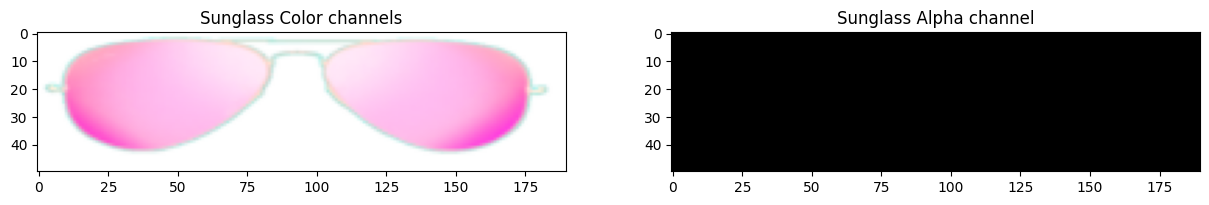

In [7]:
# Display the images for clarity
plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(glassBGR[:,:,::-1]);plt.title('Sunglass Color channels');
plt.subplot(122);plt.imshow(glassMask1,cmap='gray');plt.title('Sunglass Alpha channel');


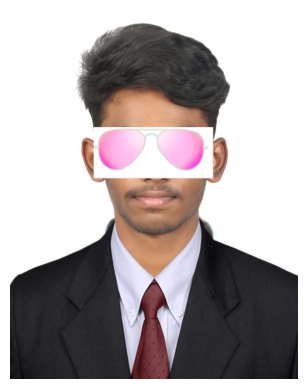

In [13]:
import cv2, numpy as np, matplotlib.pyplot as plt

# Load images
face = cv2.imread("pic.jpeg")
glass = cv2.imread("sunglasses.png", cv2.IMREAD_UNCHANGED)

# Detect eyes
eyes = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye_tree_eyeglasses.xml')\
        .detectMultiScale(cv2.cvtColor(face, cv2.COLOR_BGR2GRAY),1.1,10)

if len(eyes)>=2:
    eyes = sorted(eyes,key=lambda e:e[2]*e[3],reverse=True)[:2]
    eyes = sorted(eyes,key=lambda e:e[0])
    le, re = (eyes[0][0]+eyes[0][2]//2, eyes[0][1]+eyes[0][3]//2), (eyes[1][0]+eyes[1][2]//2, eyes[1][1]+eyes[1][3]//2)

    # Resize & position glasses
    w = int(np.linalg.norm(np.array(re)-np.array(le))*2.2)
    h = int(glass.shape[0]*(w/glass.shape[1]))
    g = cv2.resize(glass,(w,h))
    x,y = int((le[0]+re[0])/2 - w/2), int(min(le[1],re[1])-h//3)

    # Overlay with alpha
    y1,y2,x1,x2 = max(0,y), min(face.shape[0],y+h), max(0,x), min(face.shape[1],x+w)
    alpha_s = g[:y2-y1,:x2-x1,3]/255.0
    alpha_l = 1.0 - alpha_s
    for c in range(3):
        face[y1:y2,x1:x2,c] = alpha_s*g[:y2-y1,:x2-x1,c] + alpha_l*face[y1:y2,x1:x2,c]

# Show result
plt.imshow(cv2.cvtColor(face,cv2.COLOR_BGR2RGB)); plt.axis("off"); plt.show()


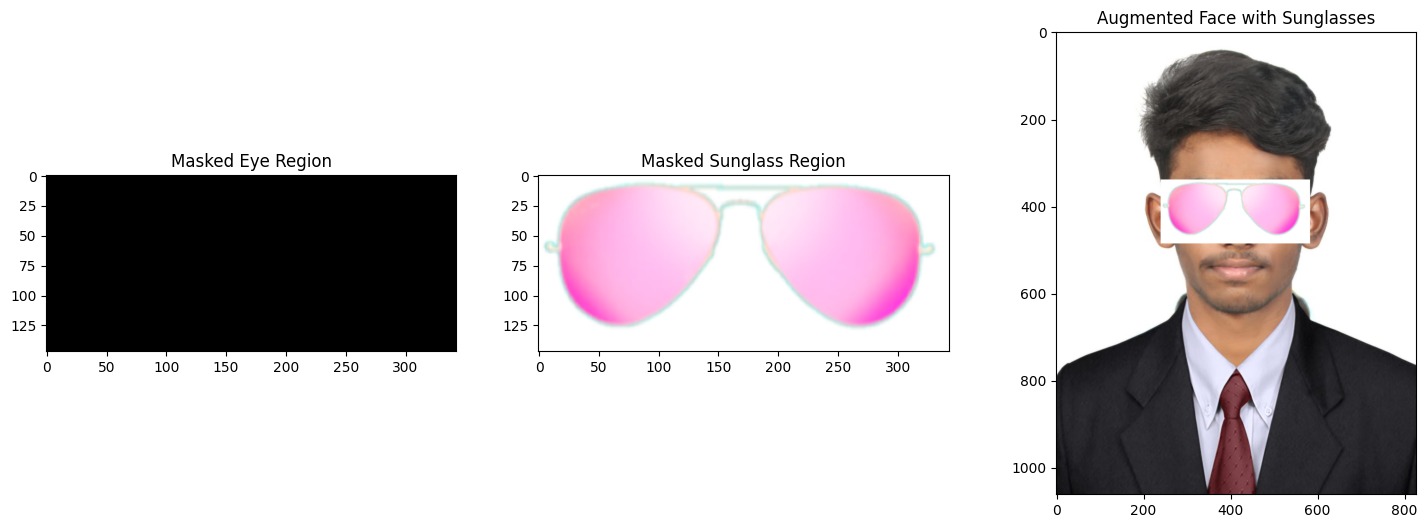

In [10]:



import cv2, numpy as np, matplotlib.pyplot as plt

# Load images
face = cv2.imread("pic.jpeg")
glass = cv2.imread("sunglasses.png", cv2.IMREAD_UNCHANGED)

# Detect eyes
eyes = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye_tree_eyeglasses.xml')\
        .detectMultiScale(cv2.cvtColor(face, cv2.COLOR_BGR2GRAY), 1.1, 10)

if len(eyes) >= 2:
    eyes = sorted(sorted(eyes, key=lambda e:e[2]*e[3], reverse=True)[:2], key=lambda e:e[0])
    le, re = (eyes[0][0]+eyes[0][2]//2, eyes[0][1]+eyes[0][3]//2), (eyes[1][0]+eyes[1][2]//2, eyes[1][1]+eyes[1][3]//2)

    # Resize & position glasses
    w = int(np.linalg.norm(np.array(re)-np.array(le))*2.2)
    h = int(glass.shape[0]*(w/glass.shape[1]))
    g = cv2.resize(glass,(w,h))
    x,y = int((le[0]+re[0])/2 - w/2), int(min(le[1],re[1])-h//3)

    # ROI
    y1,y2,x1,x2 = max(0,y), min(face.shape[0],y+h), max(0,x), min(face.shape[1],x+w)
    roi = face[y1:y2,x1:x2].copy()

    # Create masks
    alpha_s = g[:y2-y1,:x2-x1,3]/255.0
    alpha_l = 1.0 - alpha_s
    masked_eye = (roi * alpha_l[:,:,None]).astype(np.uint8)
    masked_glass = (g[:y2-y1,:x2-x1,:3] * alpha_s[:,:,None]).astype(np.uint8)
    augmented_roi = (masked_eye + masked_glass).astype(np.uint8)

    # Overlay on face
    face_with_glass = face.copy()
    face_with_glass[y1:y2,x1:x2] = augmented_roi

# Display all outputs
plt.figure(figsize=[18,6])
plt.subplot(131); plt.imshow(cv2.cvtColor(masked_eye, cv2.COLOR_BGR2RGB)); plt.title("Masked Eye Region")
plt.subplot(132); plt.imshow(cv2.cvtColor(masked_glass, cv2.COLOR_BGR2RGB)); plt.title("Masked Sunglass Region")
plt.subplot(133); plt.imshow(cv2.cvtColor(face_with_glass, cv2.COLOR_BGR2RGB)); plt.title("Augmented Face with Sunglasses")
plt.show()




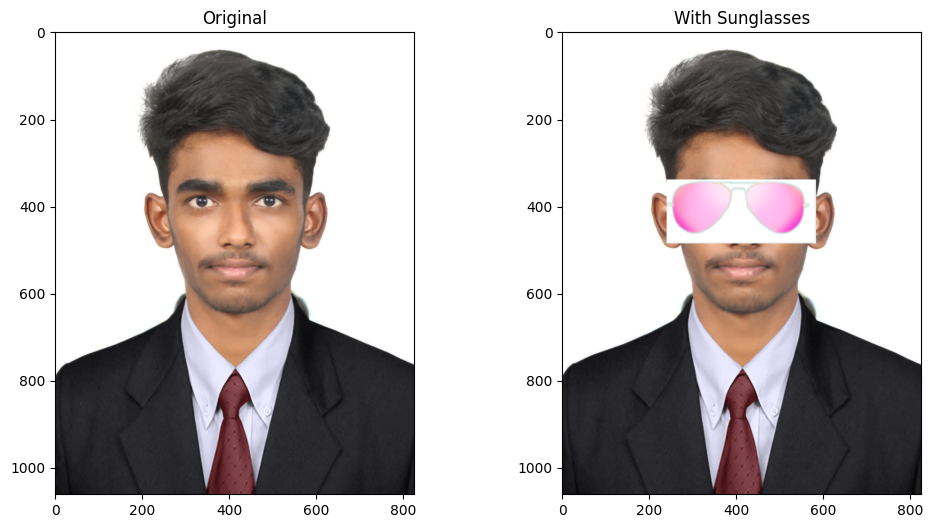

In [14]:

import cv2, numpy as np, matplotlib.pyplot as plt

# Load images
face = cv2.imread("pic.jpeg")
glass = cv2.imread("sunglasses.png", cv2.IMREAD_UNCHANGED)

# Detect eyes
eyes = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye_tree_eyeglasses.xml')\
        .detectMultiScale(cv2.cvtColor(face, cv2.COLOR_BGR2GRAY),1.1,10)

if len(eyes)>=2:
    eyes = sorted(eyes,key=lambda e:e[2]*e[3],reverse=True)[:2]
    eyes = sorted(eyes,key=lambda e:e[0])
    le, re = (eyes[0][0]+eyes[0][2]//2, eyes[0][1]+eyes[0][3]//2), (eyes[1][0]+eyes[1][2]//2, eyes[1][1]+eyes[1][3]//2)
    
    w = int(np.linalg.norm(np.array(re)-np.array(le))*2.2)
    h = int(glass.shape[0]*(w/glass.shape[1]))
    g = cv2.resize(glass,(w,h))
    x,y = int((le[0]+re[0])/2 - w/2), int(min(le[1],re[1])-h//3)
    
    mask = np.uint8(cv2.merge([g[:,:,3]]*3)/255)
    y1,y2,x1,x2 = max(0,y), min(face.shape[0],y+h), max(0,x), min(face.shape[1],x+w)
    roi = face[y1:y2,x1:x2]
    face[y1:y2,x1:x2] = cv2.add(cv2.multiply(roi,1-mask[:y2-y1,:x2-x1]),
                                 cv2.multiply(g[:y2-y1,:x2-x1,:3], mask[:y2-y1,:x2-x1]))

# Show images
plt.figure(figsize=[12,6])
plt.subplot(121); plt.imshow(cv2.cvtColor(cv2.imread("pic.jpeg"),cv2.COLOR_BGR2RGB)); plt.title("Original")
plt.subplot(122); plt.imshow(cv2.cvtColor(face,cv2.COLOR_BGR2RGB)); plt.title("With Sunglasses")
plt.show()
